In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

mercedes_df=pd.read_csv('mercedes.csv')

mercedes_df.shape
mercedes_df.columns

y=mercedes_df['y']
mercedes_df.drop(columns='y',inplace=True)

mercedes_df

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,k,v,at,a,d,u,j,o,0,...,0,0,1,0,0,0,0,0,0,0
1,6,k,t,av,e,d,y,l,o,0,...,1,0,0,0,0,0,0,0,0,0
2,7,az,w,n,c,d,x,j,x,0,...,0,0,0,0,0,0,1,0,0,0
3,9,az,t,n,f,d,x,l,e,0,...,0,0,0,0,0,0,0,0,0,0
4,13,az,v,n,f,d,h,d,n,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,ak,s,as,c,d,aa,d,q,0,...,1,0,0,0,0,0,0,0,0,0
4205,8406,j,o,t,d,d,aa,h,h,0,...,0,1,0,0,0,0,0,0,0,0
4206,8412,ak,v,r,a,d,aa,g,e,0,...,0,0,1,0,0,0,0,0,0,0
4207,8415,al,r,e,f,d,aa,l,u,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
missing_value_percentage_df=pd.DataFrame({'Column_Name':mercedes_df.columns,
                                          'Missing_value_count':mercedes_df.isnull().sum(),
                                          'Missing_value_percentage':mercedes_df.isnull().sum()/mercedes_df.shape[0]*100})

missing_value_percentage_df=missing_value_percentage_df.sort_values(by='Missing_value_percentage',ascending=False)

missing_value_percentage_df


,Column_Name,Missing_value_count,Missing_value_percentage
ID,ID,0,0.0
X255,X255,0,0.0
X264,X264,0,0.0
X263,X263,0,0.0
X262,X262,0,0.0
...,...,...,...
X128,X128,0,0.0
X127,X127,0,0.0
X126,X126,0,0.0
X125,X125,0,0.0


In [3]:
cols_to_drop=[]

for col in mercedes_df.columns:
    if mercedes_df[col].nunique()==mercedes_df.shape[0] or mercedes_df[col].nunique()==1:
        cols_to_drop.append(col)
        
cols_to_drop

['ID',
 'X11',
 'X93',
 'X107',
 'X233',
 'X235',
 'X268',
 'X289',
 'X290',
 'X293',
 'X297',
 'X330',
 'X347']

In [4]:
mercedes_df.drop(columns=cols_to_drop,inplace=True)

In [5]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(mercedes_df,y,test_size=0.3,random_state=43)


x_train.dtypes
        
         

X0      object
X1      object
X2      object
X3      object
X4      object
         ...  
X380     int64
X382     int64
X383     int64
X384     int64
X385     int64
Length: 364, dtype: object

In [6]:
from sklearn.preprocessing import LabelEncoder
import numpy as np


class LabelEncoderExt(object):
    def __init__(self):
        """
        It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]
        Unknown will be added in fit and transform will take care of new item. It gives unknown class id
        """
        self.label_encoder = LabelEncoder()
        # self.classes_ = self.label_encoder.classes_

    def fit(self, data_list):
        """
        This will fit the encoder for all the unique values and introduce unknown value
        :param data_list: A list of string
        :return: self
        """
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_

        return self

    def transform(self, data_list):
        """
        This will transform the data_list to id list where the new values get assigned to Unknown class
        :param data_list:
        :return:
        """
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]

        return self.label_encoder.transform(new_data_list)




In [7]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

le=LabelEncoderExt()

for col in x_train.columns:
    if x_train[col].dtype=='object':
        le.fit(x_train[col])
        x_train[col]=le.transform(x_train[col])
        x_test[col]=le.transform(x_test[col])
x_train

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
1280,35,1,9,6,3,3,7,4,0,0,...,0,0,0,0,0,0,0,0,0,0
793,28,14,4,6,3,6,9,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1642,40,4,4,1,3,4,10,13,0,0,...,0,0,1,0,0,0,0,0,0,0
3978,11,1,40,6,3,25,8,17,0,0,...,0,0,0,0,0,0,0,0,0,0
1905,31,4,16,3,3,8,12,6,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,13,24,10,2,3,13,10,21,0,0,...,1,0,0,0,0,0,0,0,0,0
2064,13,14,38,3,3,16,4,14,0,0,...,0,0,0,0,0,0,0,0,0,0
2325,9,24,37,3,3,15,4,5,0,1,...,0,0,1,0,0,0,0,0,0,0
2303,18,24,9,3,3,15,9,25,0,1,...,1,0,0,0,0,0,0,0,0,0


Text(0, 0.5, 'Explained variance ratio')

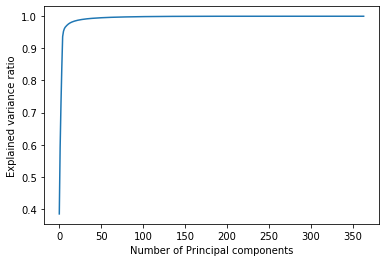

In [8]:
from sklearn.decomposition import PCA

pca=PCA()

x_train_pca_df=pd.DataFrame(pca.fit_transform(x_train))

x_train_pca_df

pca.explained_variance_ratio_

plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('Number of Principal components')
plt.ylabel('Explained variance ratio')

In [9]:
pca_1=PCA(n_components=50)

x_train_pca_df=pd.DataFrame(pca_1.fit_transform(x_train),columns=list(range(0,50)))

x_test_pca_df=pd.DataFrame(pca_1.transform(x_test))

x_train_pca_df

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-8.992918,-6.415499,-13.090951,6.490323,-8.402477,1.148071,-3.317930,1.081326,-0.056601,-0.640631,...,-0.350527,0.376369,-0.003159,-0.033530,-0.748412,0.006811,-0.254551,-0.043787,-0.328602,-0.232973
1,0.010711,-12.560818,-2.176750,7.119770,-12.270433,-1.497864,-1.773962,1.951579,-1.359794,0.076516,...,0.008574,0.000123,-0.061810,-0.250417,0.257748,-0.340026,0.196097,0.107663,-0.049021,0.070418
2,-14.417847,-10.772175,-8.020696,7.548416,-0.556096,-2.079594,3.783969,0.956454,0.196572,-0.919837,...,0.553453,0.174958,-0.091118,-0.007019,0.134253,0.378463,-0.049094,-0.155337,-0.070180,-0.083707
3,19.337170,16.957308,-11.010379,-16.150718,9.427183,0.542482,-4.015087,1.703101,0.067308,-0.753851,...,-0.142360,-0.330259,0.040866,-0.447919,0.251324,0.428327,0.110809,0.195745,0.124278,0.297052
4,-3.248148,-0.483487,-10.206875,2.117789,-5.648465,-4.018507,1.246331,-1.301905,0.229513,-0.361335,...,-0.029547,0.058434,0.217085,0.401534,0.559996,0.272231,-0.146162,-0.155671,-0.180200,-0.162443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2941,17.434809,-11.475678,7.636850,3.645526,6.662979,-2.896261,2.881011,1.119493,-0.879815,2.567962,...,-0.038693,-0.131578,0.788421,0.203080,-0.447269,0.376544,-0.905932,0.259911,-0.602274,-0.127323
2942,20.800282,16.108734,-2.149088,-3.768181,4.097215,4.024658,0.886114,1.625471,-1.538021,5.150175,...,0.144003,-0.085107,0.042143,-0.149834,-0.029230,0.004516,-0.035214,0.062107,0.097457,0.094666
2943,27.175394,15.062999,4.538708,-0.805213,-6.202816,3.673471,1.770822,-0.133327,0.371031,-1.275829,...,-0.008562,0.280246,0.134999,0.400630,0.059818,0.181605,-0.031846,0.038561,0.003056,-0.106581
2944,12.416357,-11.981517,10.212891,2.546944,10.282042,-1.621615,1.470592,0.329822,-0.557430,-0.880470,...,0.471468,-0.574306,0.494855,-0.619649,0.540338,-0.169124,-0.219483,-0.012512,0.020839,-0.168930


In [10]:
#VIF before PCA

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]

vif['Column Name']=x_train.columns

vif

,VIF Factor,Column Name
0,2.783299,X0
1,6.680951,X1
2,20.659117,X2
3,2.943191,X3
4,1.051234,X4
...,...,...
359,inf,X380
360,inf,X382
361,1.581976,X383
362,1.838050,X384


In [11]:
#VIF after PCA

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_pca = pd.DataFrame()
vif_pca["VIF Factor_PCA"] = [variance_inflation_factor(x_train_pca_df.values, i) for i in range(x_train_pca_df.shape[1])]

vif_pca['Column Name']=x_train_pca_df.columns

vif_pca

,VIF Factor_PCA,Column Name
0,1.0,0
1,1.0,1
2,1.0,2
3,1.0,3
4,1.0,4
5,1.0,5
6,1.0,6
7,1.0,7
8,1.0,8
9,1.0,9


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

lin_reg=LinearRegression()

lin_reg.fit(x_train_pca_df,y_train)

y_linreg_pred=lin_reg.predict(x_test_pca_df)

y_linreg_pred

print('R2 score from sklearn.metrics:----',r2_score(y_test,y_linreg_pred))
#print('train score:----',lin_reg.score(x_train_pca_df,y_train))
print('R2 score from Linear Regression Class:----',lin_reg.score(x_test_pca_df,y_test))

#mean_squared_error(y_test,y_linreg_pred)

lin_reg.coef_

R2 score from sklearn.metrics:---- 0.4600992266861297
R2 score from Linear Regression Class:---- 0.4600992266861297


array([ 1.67639484e-01,  2.25382459e-02, -1.52527107e-01, -1.49563837e-03,
        4.39747251e-02, -2.87351405e-02,  1.03172196e+00, -2.59345184e+00,
       -4.67827965e-01,  3.19690098e+00,  3.37574167e-01, -3.58410949e+00,
        1.32423463e+00, -2.67983924e+00, -3.98925224e-03,  7.69544214e-01,
        6.12028360e+00,  5.92242053e-01, -4.00972619e-01,  8.23732542e-01,
       -9.16533942e-01,  6.49526132e-01,  1.67750385e+00,  3.49173899e-01,
        1.22450408e+00,  7.45432529e-01, -2.31848440e-01, -8.91322404e-01,
       -8.06392783e-01,  3.37009186e-01, -1.29140255e+00,  1.62648335e-02,
       -2.15148791e+00, -5.14193950e-01, -1.12476303e-01,  1.67772210e-01,
        1.11122079e-01, -7.36385877e-01, -3.63773636e-03, -6.97179339e-01,
       -8.23613630e-01, -8.81740718e-01,  1.07053538e+00, -7.00398186e-01,
       -1.37034004e+00,  2.08144532e-01, -1.24710071e-01, -1.58729563e+00,
        1.33980289e-01,  5.85494065e-01])

In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error
dtc=DecisionTreeRegressor()
dtc.fit(x_train_pca_df,y_train)
y_pred=dtc.predict(x_test_pca_df)
y_pred
comp_df = pd.DataFrame({'Actual_values': y_test,'Predicted':y_pred})
comp_df
print('R2 Score from SKlearn.metrics:---',r2_score(y_test,y_pred))
#print('Train Score:----',lin_reg.score(X_train_pca_df,y_train))
print('R2 Score from DecisionTreeRegressor Class:----', dtc.score(x_test_pca_df,y_test))
# mean_squared_error(y_test,y_pred)
lin_reg.coef_

R2 Score from SKlearn.metrics:--- 0.07451259615659689
R2 Score from DecisionTreeRegressor Class:---- 0.07451259615659689


array([ 1.67639484e-01,  2.25382459e-02, -1.52527107e-01, -1.49563837e-03,
        4.39747251e-02, -2.87351405e-02,  1.03172196e+00, -2.59345184e+00,
       -4.67827965e-01,  3.19690098e+00,  3.37574167e-01, -3.58410949e+00,
        1.32423463e+00, -2.67983924e+00, -3.98925224e-03,  7.69544214e-01,
        6.12028360e+00,  5.92242053e-01, -4.00972619e-01,  8.23732542e-01,
       -9.16533942e-01,  6.49526132e-01,  1.67750385e+00,  3.49173899e-01,
        1.22450408e+00,  7.45432529e-01, -2.31848440e-01, -8.91322404e-01,
       -8.06392783e-01,  3.37009186e-01, -1.29140255e+00,  1.62648335e-02,
       -2.15148791e+00, -5.14193950e-01, -1.12476303e-01,  1.67772210e-01,
        1.11122079e-01, -7.36385877e-01, -3.63773636e-03, -6.97179339e-01,
       -8.23613630e-01, -8.81740718e-01,  1.07053538e+00, -7.00398186e-01,
       -1.37034004e+00,  2.08144532e-01, -1.24710071e-01, -1.58729563e+00,
        1.33980289e-01,  5.85494065e-01])

In [14]:
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import GridSearchCV

dtree=DecisionTreeRegressor()

hyp_dict={'max_depth':[2,3,4,5],
         'min_samples_split':[2,4,5],
         'min_samples_leaf':[1,4,3],
         'max_leaf_nodes':[3,4,6,7]}

grid_cv=GridSearchCV(dtree,param_grid=hyp_dict,cv=5)

grid_cv.fit(x_train_pca_df,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [2, 3, 4, 5],
                         'max_leaf_nodes': [3, 4, 6, 7],
                         'min_samples_leaf': [1, 4, 3],
                         'min_samples_split': [

In [15]:
y_dtree_predict=grid_cv.predict(x_test_pca_df)
y_dtree_predict

array([100.65680645,  94.18858018, 100.65680645, ..., 103.62468872,
       103.62468872,  99.22469767])

In [16]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

random_cv=RandomizedSearchCV(dtree,param_distributions=hyp_dict,cv=5,n_iter=300)

random_cv.fit(x_train_pca_df,y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=DecisionTreeRegressor(criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort=False,
                                                   random_state=None,
                                                   splitter='best'),
                   iid='warn', n_iter=300, n_jobs=None,
                   param_d

In [17]:
grid_cv.best_params_

grid_cv.best_score_

0.38007844161528875

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

random=RandomForestRegressor()

random.fit(x_train_pca_df,y_train)
y_pred=random.predict(x_test_pca_df)
y_pred

comp_df = pd.DataFrame({'Actual_values': y_test,'Predicted':y_pred})
comp_df
print('R2 Score from SKlearn.metrics:---',r2_score(y_test,y_pred))
#print('Train Score:----',lin_reg.score(X_train_pca_df,y_train))
print('R2 Score from DecisionTreeRegressor Class:----', random.score(x_test_pca_df,y_test))
# mean_squared_error(y_test,y_pred)
lin_reg.coef_

R2 Score from SKlearn.metrics:--- 0.39545817931834737
R2 Score from DecisionTreeRegressor Class:---- 0.39545817931834737


array([ 1.67639484e-01,  2.25382459e-02, -1.52527107e-01, -1.49563837e-03,
        4.39747251e-02, -2.87351405e-02,  1.03172196e+00, -2.59345184e+00,
       -4.67827965e-01,  3.19690098e+00,  3.37574167e-01, -3.58410949e+00,
        1.32423463e+00, -2.67983924e+00, -3.98925224e-03,  7.69544214e-01,
        6.12028360e+00,  5.92242053e-01, -4.00972619e-01,  8.23732542e-01,
       -9.16533942e-01,  6.49526132e-01,  1.67750385e+00,  3.49173899e-01,
        1.22450408e+00,  7.45432529e-01, -2.31848440e-01, -8.91322404e-01,
       -8.06392783e-01,  3.37009186e-01, -1.29140255e+00,  1.62648335e-02,
       -2.15148791e+00, -5.14193950e-01, -1.12476303e-01,  1.67772210e-01,
        1.11122079e-01, -7.36385877e-01, -3.63773636e-03, -6.97179339e-01,
       -8.23613630e-01, -8.81740718e-01,  1.07053538e+00, -7.00398186e-01,
       -1.37034004e+00,  2.08144532e-01, -1.24710071e-01, -1.58729563e+00,
        1.33980289e-01,  5.85494065e-01])

In [19]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV

random=RandomForestRegressor()

rfc_dict={'max_depth':[2,3,4,5],
         'min_samples_split':[2,4,5],
         'min_samples_leaf':[1,4,3],
         'max_leaf_nodes':[3,4,6,7]}

grid_cv=GridSearchCV(random,param_grid=hyp_dict,cv=5)

grid_cv.fit(x_train_pca_df,y_train)



GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [2, 3, 4, 5],
    

In [20]:
grid_cv.best_params_

grid_cv.best_score_

0.43251184155839206

In [21]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score,mean_squared_error

adr=AdaBoostRegressor()

adr.fit(x_train_pca_df,y_train)
y_adr_pred=adr.predict(x_test_pca_df)

y_adr_pred
print('R2 Score from SKlearn.metrics:---',r2_score(y_test,y_adr_pred))
#print('Train Score:----',lin_reg.score(X_train_pca_df,y_train))
print('R2 Score from DecisionTreeRegressor Class:----', adr.score(x_test_pca_df,y_test))
# mean_squared_error(y_test,y_pred)
lin_reg.coef_


R2 Score from SKlearn.metrics:--- 0.035933616429923654
R2 Score from DecisionTreeRegressor Class:---- 0.035933616429923654


array([ 1.67639484e-01,  2.25382459e-02, -1.52527107e-01, -1.49563837e-03,
        4.39747251e-02, -2.87351405e-02,  1.03172196e+00, -2.59345184e+00,
       -4.67827965e-01,  3.19690098e+00,  3.37574167e-01, -3.58410949e+00,
        1.32423463e+00, -2.67983924e+00, -3.98925224e-03,  7.69544214e-01,
        6.12028360e+00,  5.92242053e-01, -4.00972619e-01,  8.23732542e-01,
       -9.16533942e-01,  6.49526132e-01,  1.67750385e+00,  3.49173899e-01,
        1.22450408e+00,  7.45432529e-01, -2.31848440e-01, -8.91322404e-01,
       -8.06392783e-01,  3.37009186e-01, -1.29140255e+00,  1.62648335e-02,
       -2.15148791e+00, -5.14193950e-01, -1.12476303e-01,  1.67772210e-01,
        1.11122079e-01, -7.36385877e-01, -3.63773636e-03, -6.97179339e-01,
       -8.23613630e-01, -8.81740718e-01,  1.07053538e+00, -7.00398186e-01,
       -1.37034004e+00,  2.08144532e-01, -1.24710071e-01, -1.58729563e+00,
        1.33980289e-01,  5.85494065e-01])

In [22]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
adr=AdaBoostRegressor()

hyp_dict={'max_depth':[3],
         'n_estimators': [50]}

grid_cv=GridSearchCV(random,param_grid=hyp_dict,cv=5)

grid_cv.fit(x_train_pca_df,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [3], 'n_estimators

In [23]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error

gbr=GradientBoostingRegressor()
gbr.fit(x_train_pca_df,y_train)
y_gbr_pred=gbr.predict(x_test_pca_df)
y_gbr_pred
print('R2 Score from SKlearn.metrics:---',r2_score(y_test,y_gbr_pred))
#print('Train Score:----',lin_reg.score(X_train_pca_df,y_train))
print('R2 Score from DecisionTreeRegressor Class:----', gbr.score(x_test_pca_df,y_test))
# mean_squared_error(y_test,y_pred)
lin_reg.coef_

R2 Score from SKlearn.metrics:--- 0.4510291076276203
R2 Score from DecisionTreeRegressor Class:---- 0.4510291076276203


array([ 1.67639484e-01,  2.25382459e-02, -1.52527107e-01, -1.49563837e-03,
        4.39747251e-02, -2.87351405e-02,  1.03172196e+00, -2.59345184e+00,
       -4.67827965e-01,  3.19690098e+00,  3.37574167e-01, -3.58410949e+00,
        1.32423463e+00, -2.67983924e+00, -3.98925224e-03,  7.69544214e-01,
        6.12028360e+00,  5.92242053e-01, -4.00972619e-01,  8.23732542e-01,
       -9.16533942e-01,  6.49526132e-01,  1.67750385e+00,  3.49173899e-01,
        1.22450408e+00,  7.45432529e-01, -2.31848440e-01, -8.91322404e-01,
       -8.06392783e-01,  3.37009186e-01, -1.29140255e+00,  1.62648335e-02,
       -2.15148791e+00, -5.14193950e-01, -1.12476303e-01,  1.67772210e-01,
        1.11122079e-01, -7.36385877e-01, -3.63773636e-03, -6.97179339e-01,
       -8.23613630e-01, -8.81740718e-01,  1.07053538e+00, -7.00398186e-01,
       -1.37034004e+00,  2.08144532e-01, -1.24710071e-01, -1.58729563e+00,
        1.33980289e-01,  5.85494065e-01])

In [24]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
gbr=GradientBoostingRegressor()
hyp_dict={'max_depth':[3],
          'min_samples_split':[2],
          'min_samples_leaf':[1],
          'max_leaf_nodes':[4,5],
         'n_estimators': [50]}
grid_cv=GridSearchCV(gbr,param_grid=hyp_dict,cv=5)
grid_cv.fit(x_train_pca_df,y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                

In [25]:
from sklearn.svm import SVR

from sklearn.metrics import r2_score,mean_squared_error

gbr=GradientBoostingRegressor()
gbr.fit(x_train_pca_df,y_train)
y_gbr_pred=gbr.predict(x_test_pca_df)
y_gbr_pred
print('R2 Score from SKlearn.metrics:---',r2_score(y_test,y_gbr_pred))
#print('Train Score:----',lin_reg.score(X_train_pca_df,y_train))
print('R2 Score from DecisionTreeRegressor Class:----', gbr.score(x_test_pca_df,y_test))
# mean_squared_error(y_test,y_pred)
lin_reg.coef_

R2 Score from SKlearn.metrics:--- 0.4501662934052034
R2 Score from DecisionTreeRegressor Class:---- 0.4501662934052034


array([ 1.67639484e-01,  2.25382459e-02, -1.52527107e-01, -1.49563837e-03,
        4.39747251e-02, -2.87351405e-02,  1.03172196e+00, -2.59345184e+00,
       -4.67827965e-01,  3.19690098e+00,  3.37574167e-01, -3.58410949e+00,
        1.32423463e+00, -2.67983924e+00, -3.98925224e-03,  7.69544214e-01,
        6.12028360e+00,  5.92242053e-01, -4.00972619e-01,  8.23732542e-01,
       -9.16533942e-01,  6.49526132e-01,  1.67750385e+00,  3.49173899e-01,
        1.22450408e+00,  7.45432529e-01, -2.31848440e-01, -8.91322404e-01,
       -8.06392783e-01,  3.37009186e-01, -1.29140255e+00,  1.62648335e-02,
       -2.15148791e+00, -5.14193950e-01, -1.12476303e-01,  1.67772210e-01,
        1.11122079e-01, -7.36385877e-01, -3.63773636e-03, -6.97179339e-01,
       -8.23613630e-01, -8.81740718e-01,  1.07053538e+00, -7.00398186e-01,
       -1.37034004e+00,  2.08144532e-01, -1.24710071e-01, -1.58729563e+00,
        1.33980289e-01,  5.85494065e-01])

In [28]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

n=KNeighborsRegressor()

hyp_dict={'n_neighbors':[3],
          'weights':['uniform'],
          'p':[1,2],
         'metric':['minkowski']}
          
grid_cv=GridSearchCV(n,param_grid=hyp_dict,cv=5)

grid_cv.fit(x_train_pca_df,y_train)

hyp_pred=grid_cv.predict(x_test_pca_df)

hyp_pred


array([ 90.17333333,  98.43      , 104.19666667, ..., 120.89666667,
        89.51666667, 108.58666667])